## Final Exam

----------

### Problem 4

#### 4.(2)

In [15]:
import numpy as np
from typing import Dict, Callable

# Weight applied to sample S_t-1
Wss : np.ndarray = np.array(
    [
        [-1, 0],
        [ 0, 1]
    ]
)

# Weight applied to each new word X_t
Wsx : np.ndarray = np.array(
    [
        [1, 0],
        [0, 1]
    ]
)

# Activation functions
f1 : Callable = lambda x : np.maximum(0, x)            # ReLu
f2 : Callable = lambda x : np.maximum(0, np.sign(x))   # Sign (0 when negative, 1 when positive)

# We have a vocabulary of 2 words "A" and "B". We use one-hot
# encoding to convert them into sparse two dimensional vectors.
# We have 3 different sentences made up from this vocabulary
# 
#   - AA
#   - ABB
#   - BAA
# 
# The encoding for the first sentence is [[1, 0], [1, 0]]. The
# next ones follow the same scheme. Here we declare each one.
sentences : Dict[str, np.ndarray] = {

    # AA
    "S1" : np.array(
        [
            [1, 0],
            [1, 0]
        ]
    ),

    # ABB
    "S2" : np.array(
        [
            [1, 0],
            [0, 1],
            [0, 1]
        ]
    ),

    # BAA
    "S3" : np.array(
        [
            [0, 1],
            [1, 0],
            [1, 0]
        ]
    ),
}

# CHANGE THIS: We select the sentence to process
sentence : np.ndarray = sentences["S3"]

# Initial state s0 (Column vector)
st : np.ndarray = np.array([[0, 0]]).T

# Whether to print stuff or not
debug : bool = False

# Go through each word in the sentence
for idx, word in enumerate(sentence):

    # Each word here consists of a column vector, here the dimensionless
    # vector is turned into a column vector
    xt : np.ndarray = np.reshape(word, (-1, 1))
    
    # Print additional debug messages if on debug mode
    if debug:
        print(f"Word {idx}:")
        print(Wss)
        print(st)
        print(Wsx)
        print(xt)

    # We get the state St from the previous state and the new word xt
    st = f1(Wss @ st + Wsx @ xt)

# Output logits
print("Output logits:")
print(st)

Output logits:
[[0]
 [1]]


#### 4. (4)

A simpler model to classify sentences is to represent the entire sentence into a vector $z$ and apply a linear model on $z$ , i.e.

$$y = \text{sign}(W^{z,y}z)$$
 
The vector $z$ has length $|V|$ and the $i$ th element of $z$ is the count of how many times the th word appears in the sentence. For example, the sentence ABA with $V= {A, B}$ will be encoded as $z = [2, 1]^T$. If we want the RNN we described earlier to match the output of this linear model given any input sentences, Which of the following is a possible setting of the weights and initial state $s_0$ of the RNN?

In [23]:
# We select the sentence to process
sentence : np.ndarray = sentences["S3"]

# Vocabulary size
# (Total number of words in the vocabulary. Right now just A and B)
vocabulary_size : int = 2

# Initial state s0 (Column vector)
# st : np.ndarray = np.ones((vocabulary_size, 1))
st : np.ndarray = np.zeros((vocabulary_size, 1))

# Weights
Wss : np.ndarray = np.identity(vocabulary_size)
Wsx : np.ndarray = np.identity(vocabulary_size)

# Go through each word in the sentence
for idx, word in enumerate(sentence):

    # Each word here consists of a column vector, here the dimensionless
    # vector is turned into a column vector
    xt : np.ndarray = np.reshape(word, (-1, 1))

    # We get the state St from the previous state and the new word xt
    st = f1(Wss @ st + Wsx @ xt)

# Output logits
print("Output logits:")
print(st)

Output logits:
[[2.]
 [1.]]


##### Analyzing the 2nd Option

Option: $s_0=1^{|V|}$, $W^{s,s}=I_{|V|}$, $W^{s,x}=I_{|V|}$, $W^{s,y}=W^{z,y}$, $W_0=-\sum _ i W^{z,y}_ i$

Notes:
- On the first sentence (AA) the output is [3, 1]. 
- On the second sentence (ABB) the output is [2, 3].
- On the third sentence (BAA) the output is [3, 2]

For the final step in the model, we want the input to be a count of how many times each word appears in a sentence. If we analyze the outputs that we got, we are receiving 1 number above the actual count. For example: For the sentence AA we would expect to get [2, 0] (Since there are 2 A's and 0 B's), but we are getting that plus one: [3, 1]

So apparently, the weights for the final layer will not have to change from the ones used in the model with a sign(W_z,y * z) at the end. The only thing that we would need to change is the bias. Since we need to adjust the counts by 1 before feeding them into the next part, we could use the "non-adjusted output" (With counts + 1), multiply it by the "Wzy" weights and then remove the "+1" residue with the bias.

Thats why the second option is valid

##### Analyzing the 4th Option

Option: $s_0=0^{|V|}$, $W^{s,s}=I_{|V|}$, $W^{s,x}=I_{|V|}$, $W^{s,y}=W^{z,y}$, $W_0=0$

Notes: 
- On the first sentence (AA) the output is [2, 0]. 
- On the second sentence (ABB) the output is [1, 2].
- On the third sentence (BAA) the output is [2, 1]

The hidden layer for this model actually outputs the counts for each letter (AA is [2, 0] for example). This means that the final weights applied can be the same as the ones used in the new "sign(Wzy * z)" model, and, since the inputs for the final layer will be the actual counts, no bias is required to adjust for this like in the second option.

This is why the last option is also valid.

#### 4. (5)

Now suppose we want to use indicators instead of counts for the vector $z$. That is the $i$ th element of $z$ will be 1 if the $i$ th word appears anywhere in the sentence.

In [36]:
# We select the sentence to process
sentence : np.ndarray = sentences["S3"]

# Vocabulary size
# (Total number of words in the vocabulary. Right now just A and B)
vocabulary_size : int = 2

# Select the exercise option to analyze
option : int = 4

# Different settings for the intermediate layer.
# Each one represents an option in the 4.(5) question of the exam
if option == 1:
    st : np.ndarray = np.ones((vocabulary_size, 1))
    Wss : np.ndarray = np.identity(vocabulary_size)
    Wsx : np.ndarray = -np.identity(vocabulary_size)
elif option == 2:
    st : np.ndarray = np.ones((vocabulary_size, 1))
    Wss : np.ndarray = np.identity(vocabulary_size)
    Wsx : np.ndarray = -np.identity(vocabulary_size)
elif option == 3:
    st : np.ndarray = np.zeros((vocabulary_size, 1))
    Wss : np.ndarray = np.identity(vocabulary_size)
    Wsx : np.ndarray = np.identity(vocabulary_size)
elif option == 4:
    st : np.ndarray = np.zeros((vocabulary_size, 1))
    Wss : np.ndarray = np.identity(vocabulary_size)
    Wsx : np.ndarray = -np.identity(vocabulary_size)

# Go through each word in the sentence
for idx, word in enumerate(sentence):

    # Each word here consists of a column vector, here the dimensionless
    # vector is turned into a column vector
    xt : np.ndarray = np.reshape(word, (-1, 1))
    
    # We get the state St from the previous state and the new word xt
    st = f1(Wss @ st + Wsx @ xt)

# Output logits
print("Output logits:")
print(st)

Output logits:
[[0.]
 [0.]]


##### Notes

Desired Encodings:
- Sentence 1 (AA) - Output: [1, 0]
- Sentence 2 (ABB) - Output: [1, 1]
- Sentence 3 (BAA) - Output: [1, 1] 

Option 1:
- Sentence 1 - Output: [0, 1]
- Sentence 2 - Output: [0, 0]
- Sentence 3 - Output: [0, 0] 

Zeros seem to be flipped with ones with respect to the desired encodings. This option suggests flipping the sign in the inputs and then adding a bias. If we think that the weights for the output consist of a negative identity matrix, and the bias has a value of 1, all of the outputs will get their actual desired value

   [0, 1] * -1 = [0, -1] + 1 = [1, 0] <br>
   [0, 0] * -1 = [0,  0] + 1 = [1, 1] <br>
   [0, 0] * -1 = [0,  0] + 1 = [1, 1] <br>

This makes me think that this is a valid option.


Option 2: 
- Sentence 1 - Output: [0, 1]
- Sentence 2 - Output: [0, 0]
- Sentence 3 - Output: [0, 0] 

Settings are the same as option 1, both should return the same results for their hidden layer. What changes are the suggested modifications. This option suggests that both the weights and bias flip their sign. I think the weights would get lost in the product with a bunch of zeros, and the addition of a negative bias would probably switch the zeros and one into negative values, a change that will change the final labels for the predictions. So... I think its not this one.


Option 3: 
- Sentence 1 (AA) - Output: [2, 0]
- Sentence 2 (ABB) - Output: [1, 2]
- Sentence 3 (BAA) - Output: [2, 1] 

This is the representation that we searched for in the "4.(4)" exercise. However, this option suggests that we don't use a bias and just multiply the hidden layer outputs (logits) by some weights. Since the logits have a higher value, we cannot use the same logits for our RNN as in the "sign(Ws,y * z)" output function, or the result wont be the same, it will be higher. 

However, the model has zeros in the right places. Could be that, after applying the sign() those changes in magnitude wont even matter. Could be this one.

Option 4:
- Sentence 1 (AA) - Output: [0, 0]
- Sentence 2 (ABB) - Output: [0, 0]
- Sentence 3 (BAA) - Output: [0, 0]

Not useful at all. All encodings are the same and don't bring any actual useful information to the table. Definitely not this one.

----------------

### Problem 6

#### 6. (1)

Which user-item pair is mapped to the points A, B, C, D in the $\, \left(f(z_1),f(z_2)\right)-$ plane below? In other words, for each feature representation $\, [f (z_1 ), f (z_2 )]^ T\,$, find the corresponding user-item pair (e.g. $(a,1)$ is the pair user $a$ and item $1$) that is mapped to it using the input-to-hidden layer weights.

In [78]:
# Users (a, b)
# We use one-hot encoding for each user. 
a : np.ndarray = np.array([[1, 0]])
b : np.ndarray = np.array([[0, 1]])

# Recommended items (1, 2)
# We use one-hot encoding once again
one : np.ndarray = np.array([[1, 0]])
two : np.ndarray = np.array([[0, 1]])

# Hidden unit weights
V : np.ndarray = np.array(
    [
        [-1, 1],
        [ 1, 0]
    ]
)
U : np.ndarray = np.array(
    [
        [ 1,  1],
        [ 1, -1]
    ]
)

# Activation function (ReLu)
f : Callable = lambda x: np.maximum(0, x)

# Select the user and item to use
user : np.ndarray = a
item : np.ndarray = two

# Get the two outputs of the hidden units
fz = f(user @ U + item @ V)

# Hidden unit output
print("Hidden Unit Output:", fz)

Hidden Unit Output: [[2 1]]


#### 6. (2) and (3)

In [79]:
from typing import List

# All possible user, item pairs
user_item_pairs : List[tuple] = [
    (a, one),
    (a, two),
    (b, one),
    (b, two)
]

# Output weights and bias
# ( -1/4, 1) = [[1, 1], [1, -1]]    POSSIBLE
W : np.ndarray = np.array([[1, 1]])
W0 : float = -1

# Output activation function
sign : Callable = lambda x: np.sign(x)

# Initialize the list of outputs
outputs : list = []

# Go through all possible outputs
for idx, pair in enumerate(user_item_pairs):

    # Get the user and item to use from the pair tuple
    user : np.ndarray = pair[0]
    item : np.ndarray = pair[1]

    # Get the two outputs of the hidden units
    fz = f(user @ U + item @ V)

    # Neural net output
    out = sign(fz @ W.T + W0)

    # Append to the outputs list
    # (Convert all zeros to ones)
    outputs.append(out.item() if out.item() != 0 else 1.0)

# Resulting matrix
print("Output Matrix:")
print("    1  2")
print(f"a [{outputs[0]}, {outputs[1]}]")
print(f"b [{outputs[2]}, {outputs[3]}]")


Output Matrix:
    1  2
a [1, 1]
b [-1, 1]


-------------

### Problem 1

#### 1.(1)

Reached convergence. Num errors: 1
Theta: [[1. 1.]]
Bias: [1]


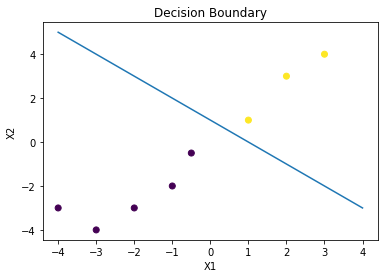

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Samples
x : np.ndarray = np.array(
    [
        [1, 1],
        [2, 3],
        [3, 4],
        [-0.5, -0.5],
        [-1, -2],
        [-2, -3],
        [-3, -4],
        [-4, -3]
    ]
)

# Labels
y : np.ndarray = np.array([[1, 1, 1, -1, -1, -1, -1, -1]]).T

# Weights and biases
theta : np.ndarray = np.array([[0, 0]]).T
bias : float = 0

# Number of iterations
T : int = 1000

# Number of errors
num_errors : int = 0

# Go through each iteration
for t in range(T):

    theta_prev : np.ndarray = theta
    bias_prev : float = bias

    # Go through each point in X
    for i, xi in enumerate(x):

        # We reshape xi to be a column vector
        xi = np.reshape(xi, (-1, 1))

        # We check if the generated label for Xi is wrong 
        # (has a different sign than the label Yi)
        if (y[i] * (theta.T @ xi * bias)) <= 0:

            # Update theta and the bias in case of a wrong prediction
            theta = theta + y[i] * xi
            bias = bias + y[i]

            # Increase the error count by 1
            num_errors += 1

    # If theta has not changed
    if (theta == theta_prev).all() and bias == bias_prev:
        print(f"Reached convergence. Num errors: {num_errors}")
        break

# Print results
print(f"Theta: {theta.T}")
print(f"Bias: {bias}")

# Coordinates for the boundary
# To get the boundary we set the equation: theta[0] * x1 + theta[1] * x2 + bias 
# equal to 0 and then reorganize the equation to express x2 in terms of x1.
# There, my x1 will be equal to x and x2 to y in a regular x-y plot.
boundary_x = np.linspace(-4, 4)
boundary_y = (bias - theta[0] * boundary_x) / theta[1]

# Plot the boundary
plt.plot(boundary_x, boundary_y)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary")
plt.show()

#### 1. (2)

Reached convergence. Num errors: 0
Theta: [[0.5 0.5]]


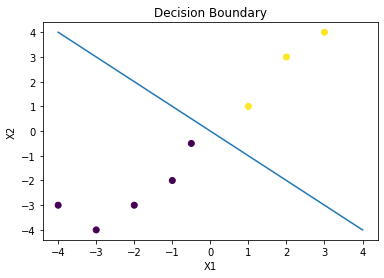

In [9]:
# Weights and biases
theta : np.ndarray = np.array([[0.5, 0.5]]).T

# Number of iterations
T : int = 1000

# Number of errors
num_errors : int = 0

# Go through each iteration
for t in range(T):

    theta_prev : np.ndarray = theta

    # Go through each point in X
    for i, xi in enumerate(x):

        # We reshape xi to be a column vector
        xi = np.reshape(xi, (-1, 1))

        # We check if the generated label for Xi is wrong 
        # (has a different sign than the label Yi)
        if (y[i] * (theta.T @ xi)) <= 0:

            # Update theta and the bias in case of a wrong prediction
            theta = theta + y[i] * xi

            # Increase the error count by 1
            num_errors += 1

    # If theta has not changed
    if (theta == theta_prev).all():
        print(f"Reached convergence. Num errors: {num_errors}")
        break

# Print results
print(f"Theta: {theta.T}")

# Coordinates for the boundary
# To get the boundary we set the equation: theta[0] * x1 + theta[1] * x2
# equal to 0 and then reorganize the equation to express x2 in terms of x1.
# There, my x1 will be equal to x and x2 to y in a regular x-y plot.
boundary_x = np.linspace(-4, 4)
boundary_y = (- theta[0] * boundary_x) / theta[1]

# Plot the boundary
plt.plot(boundary_x, boundary_y)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary")
plt.show()

#### 1. (3)

In [11]:
# Rotation matrix
R : np.ndarray = np.array(
    [
        [np.cos(np.deg2rad(60)), -np.sin(np.deg2rad(60))],
        [np.sin(np.deg2rad(60)),  np.cos(np.deg2rad(60))]
    ]
)

# Rotated samples
rotated_x = x @ R.T

# Print the rotated samples
for idx, sample in enumerate(rotated_x):
    print(f"Rotated {x[idx, :]}: ", sample)

Rotated [1. 1.]:  [-0.3660254  1.3660254]
Rotated [2. 3.]:  [-1.59807621  3.23205081]
Rotated [3. 4.]:  [-1.96410162  4.59807621]
Rotated [-0.5 -0.5]:  [ 0.1830127 -0.6830127]
Rotated [-1. -2.]:  [ 1.23205081 -1.8660254 ]
Rotated [-2. -3.]:  [ 1.59807621 -3.23205081]
Rotated [-3. -4.]:  [ 1.96410162 -4.59807621]
Rotated [-4. -3.]:  [ 0.59807621 -4.96410162]


#### 1. (4)

Reached convergence. Num errors: 1
Theta: [[-0.3660254  1.3660254]]
Bias: [1]


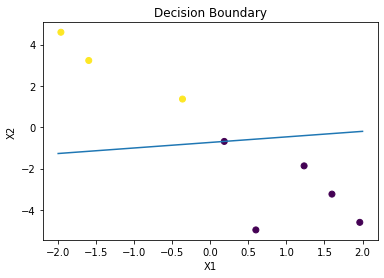

In [12]:
# Weights and biases
theta : np.ndarray = np.array([[0, 0]]).T
bias : float = 0

# Number of iterations
T : int = 1000

# Number of errors
num_errors : int = 0

# Go through each iteration
for t in range(T):

    theta_prev : np.ndarray = theta
    bias_prev : float = bias

    # Go through each point in X
    for i, xi in enumerate(rotated_x):

        # We reshape xi to be a column vector
        xi = np.reshape(xi, (-1, 1))

        # We check if the generated label for Xi is wrong 
        # (has a different sign than the label Yi)
        if (y[i] * (theta.T @ xi * bias)) <= 0:

            # Update theta and the bias in case of a wrong prediction
            theta = theta + y[i] * xi
            bias = bias + y[i]

            # Increase the error count by 1
            num_errors += 1

    # If theta has not changed
    if (theta == theta_prev).all() and bias == bias_prev:
        print(f"Reached convergence. Num errors: {num_errors}")
        break

# Print results
print(f"Theta: {theta.T}")
print(f"Bias: {bias}")

# Coordinates for the boundary
# To get the boundary we set the equation: theta[0] * x1 + theta[1] * x2 + bias 
# equal to 0 and then reorganize the equation to express x2 in terms of x1.
# There, my x1 will be equal to x and x2 to y in a regular x-y plot.
boundary_x = np.linspace(-2, 2)
boundary_y = (- bias - theta[0] * boundary_x) / theta[1]

# Plot the boundary
plt.plot(boundary_x, boundary_y)
plt.scatter(rotated_x[:, 0], rotated_x[:, 1], c = y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary")
plt.show()